### Name: Tarun Dadlani
### CWID: 20010209
### Class: CS513-B

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
# Reading the data
cancer_data_df = pd.read_csv('breast-cancer-wisconsin.csv')

# checking NaN/null value count
cancer_data_df = cancer_data_df.replace("?", np.NaN)
cancer_data_df.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

In [83]:
# finding mean of the columns with null values
cancer_data_df['F6'] = pd.to_numeric(cancer_data_df['F6'])
F6_MEAN = cancer_data_df['F6'].mean()
# Do label encoding for the missing values
# replacing null with mean
cancer_data_df['F6'] = cancer_data_df['F6'].fillna(F6_MEAN)
cancer_data_df.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

In [84]:
# Split the data into training and testing sets
X = cancer_data_df.drop('Class', axis=1)
y = cancer_data_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [85]:
# Inatializing, training and testing the model
model_c5 = DecisionTreeClassifier(criterion='entropy', max_depth=3,splitter='best',max_leaf_nodes=5)
model_c5.fit(X_train,y_train)
y_pred=model_c5.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("C5.0 Results\n")
print("Classification Report: \n")
print(classification_report(y_test, y_pred), end="\n")

print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy: {accuracy_score(y_test, y_pred)}')

C5.0 Results

Classification Report: 

              precision    recall  f1-score   support

           2       0.96      0.94      0.95       132
           4       0.90      0.94      0.92        78

    accuracy                           0.94       210
   macro avg       0.93      0.94      0.93       210
weighted avg       0.94      0.94      0.94       210


Confusion Matrix:
[[124   8]
 [  5  73]]

Accuracy: 0.9380952380952381


In [87]:
# Inatializing, training and testing the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Random Forest Results\n")
print("Classification Report: \n")
print(classification_report(y_test, y_pred), end="\n")

print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy: {accuracy_score(y_test, y_pred)}')

Random Forest Results

Classification Report: 

              precision    recall  f1-score   support

           2       1.00      0.95      0.98       132
           4       0.93      1.00      0.96        78

    accuracy                           0.97       210
   macro avg       0.96      0.98      0.97       210
weighted avg       0.97      0.97      0.97       210


Confusion Matrix:
[[126   6]
 [  0  78]]

Accuracy: 0.9714285714285714


Important Features: 


(0.0, 1.0)

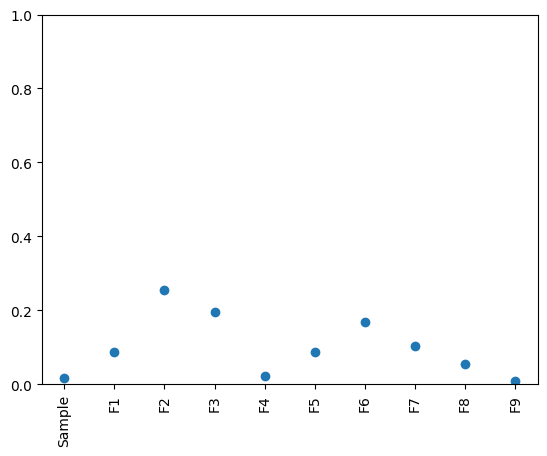

In [89]:
print('Important Features: ')
plt.plot(model.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.ylim(0, 1)